**#  WorkFlow:**

## **Problem Statement: Cifar10 image classification using ANN**

1- Dataset : Cifar10

   No. of samples: 60000

   No. of target classes: 10,

   target_names=[ "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog" "Frog", "Horse", "Ship", "Truck"]

2- Data Preprocessing:
  Load the dataset , and save it at the specified root location  and then convert it into tensors and normalize it.

3- Model Training:

   Loading the data in batches using DataLoader(), then reshaping the x_batches to the size of (batch_size, 3 x 32 x 32) , then making predictions on this data. Now the data is in the form of raw logits , I do not have convert it into probabilites using softmax as I am using the CrossEntropyLoss()  loss function which automatically converts the raw logits into probabilites internally.

   CrossEntropyLoss():

   Calculating the loss on the predictions
   
   Backward Pass:
   
   First , making the gradients zero in each iteration and then calculating the gradients during the backward pass and updating the weights accordingly using the .step() function.

4- Testing the model :

Then test the model with not updating the gradients and calculating the loss and accuracy.


In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Data Loading and Preprocessing:**

In [2]:

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

train_data=torchvision.datasets.CIFAR10(root='C:\\Users\\it zone\\OneDrive\\Documents\\Uni books\\4th semester\\programming for AI\\PAI final lab project',train=True,transform=transform,download=True)
test_data=torchvision.datasets.CIFAR10(root='C:\\Users\\it zone\\OneDrive\\Documents\\Uni books\\4th semester\\programming for AI\\PAI final lab project',train=False,transform=transform,download=True)

100%|██████████| 170M/170M [00:01<00:00, 100MB/s]


Extracting C:\Users\it zone\OneDrive\Documents\Uni books\4th semester\programming for AI\PAI final lab project/cifar-10-python.tar.gz to C:\Users\it zone\OneDrive\Documents\Uni books\4th semester\programming for AI\PAI final lab project
Files already downloaded and verified


In [3]:
from torch.utils.data import random_split

val_size = int(0.5 * len(test_data))
test_size = len(test_data) - val_size
val_data, test_data = random_split(test_data, [ val_size,test_size])
print(len(train_data))
print(len(val_data))
print(len(test_data))

50000
5000
5000


In [4]:
image,label=train_data[0]
print(image.shape)
print(label)
classes = train_data.classes
print("Class names:", classes)

torch.Size([3, 32, 32])
6
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# **Model:**

In [5]:
class Linear_layer(nn.Module):
  def __init__(self,input_size,output_size):
    super(Linear_layer,self).__init__()
    self.weights=nn.Parameter(torch.randn(input_size,output_size))
    self.bias=nn.Parameter(torch.randn(output_size))

  def forward(self,x):
    return torch.matmul(x,self.weights)+self.bias


class Relu(nn.Module):
  def __init(self):
    super(Relu,self).__init__()

  def forward(self,x):
    return torch.max(x,torch.tensor(0.0))

In [6]:
class Classifier(nn.Module):
    def __init__(self,input_size,output_size, hidden_layers):
        super(Classifier,self).__init__()

        previous=input_size
        layers=[]

        for units in hidden_layers:
          layers.append(Linear_layer(previous, units))
          layers.append( Relu())
          previous=units

        layers.append(Linear_layer(previous,output_size))
        self.sequential=nn.Sequential(*layers)

    def forward(self,x):
      logits=self.sequential(x)
      return logits



# **Training the model:**

In [7]:
def train_model(model,train_data,val_data,batch_size,n_epochs,loss_fn,optimizer):
  train_data_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
  val_data_loader=DataLoader(val_data,batch_size=batch_size,shuffle=False)

  train_losses=[]
  val_losses=[]
  train_accuracy=[]
  val_accuracy=[]
  for epoch in range(n_epochs):

    model.train()
    batch_train_accuracy=[]
    batch_val_accuracy=[]
    train_loss_sum=0
    val_loss_sum=0

    for x_batch,y_batch in train_data_loader:
      x_batch=x_batch.view(x_batch.size(0),-1)
      y_pred=model(x_batch)
      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      predicted_label=torch.argmax(y_pred,dim=1)
      batch_train_accuracy.append((predicted_label==y_batch).float().mean())
      train_loss_sum+=loss.item()


    train_losses.append(train_loss_sum/len(train_data_loader))
    train_accuracy.append(torch.tensor(batch_train_accuracy).mean())




    model.eval()
    with torch.no_grad():
      for x_batch,y_batch in val_data_loader:
        x_batch=x_batch.view(x_batch.size(0),-1)
        y_pred=model(x_batch)
        val_loss=loss_fn(y_pred,y_batch)
        predicted_label=torch.argmax(y_pred,dim=1)
        batch_val_accuracy.append((predicted_label==y_batch).float().mean())
        val_loss_sum+=val_loss.item()



    val_accuracy.append(torch.tensor(batch_val_accuracy).mean())
    val_losses.append(val_loss_sum/len(val_data_loader))


    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f} , Val Loss: {val_losses[-1] }')



  return model,train_losses,val_losses,train_accuracy,val_accuracy

In [8]:
input_size = 3 * 32 * 32
output_size = 10
hidden_layers = [512, 256, 128, 64, 32]

model = Classifier(input_size, output_size, hidden_layers)
batch_size=1000
n_epochs=100
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)

trained_model,losses_for_train,losses_for_validation,train_accuracy,val_accuracy=train_model(model,train_data,val_data,batch_size,n_epochs,loss_fn,optimizer)

Epoch 1, Train Loss: 1011338.9569 , Val Loss: 412867.825
Epoch 2, Train Loss: 311667.5950 , Val Loss: 246285.271875
Epoch 3, Train Loss: 200243.4788 , Val Loss: 178965.7375
Epoch 4, Train Loss: 149036.0656 , Val Loss: 140942.753125
Epoch 5, Train Loss: 117529.6586 , Val Loss: 116161.2296875
Epoch 6, Train Loss: 96135.5100 , Val Loss: 99135.8171875
Epoch 7, Train Loss: 81057.5678 , Val Loss: 86362.346875
Epoch 8, Train Loss: 69763.2804 , Val Loss: 76610.0890625
Epoch 9, Train Loss: 60862.4013 , Val Loss: 68431.628125
Epoch 10, Train Loss: 53651.2898 , Val Loss: 61997.2640625
Epoch 11, Train Loss: 47775.2516 , Val Loss: 56354.20625
Epoch 12, Train Loss: 42764.6719 , Val Loss: 51590.43515625
Epoch 13, Train Loss: 38544.8167 , Val Loss: 47652.57109375
Epoch 14, Train Loss: 34951.7172 , Val Loss: 44132.76953125
Epoch 15, Train Loss: 31820.1184 , Val Loss: 41045.18671875
Epoch 16, Train Loss: 29095.4204 , Val Loss: 38301.70703125
Epoch 17, Train Loss: 26669.2208 , Val Loss: 35898.2609375
Epo

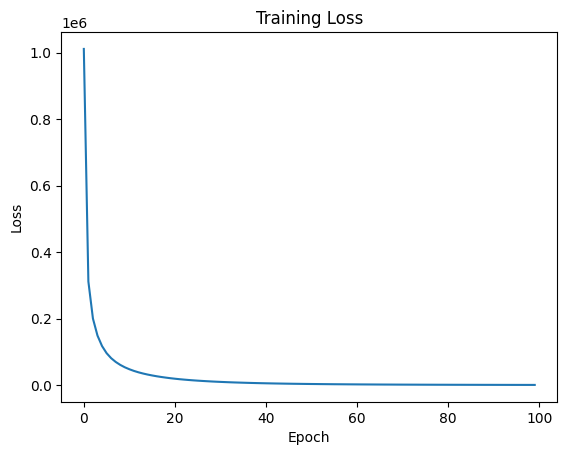

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses_for_train)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# **Model Testing:**

In [10]:
def test_model(test_data,batch_size):
  test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)
  model.eval()

  with torch.no_grad():

      actual=[]
      predictions=[]
      for x_batch,y_batch in test_loader:
        x_batch=x_batch.view(x_batch.size(0),-1)
        y_pred=model(x_batch)
        predictions.append(y_pred.numpy())
        actual.append(y_batch.numpy())


      predictions=np.concatenate(predictions,axis=0)
      actual=np.concatenate(actual,axis=0)

      predicted_labels=np.argmax(predictions,axis=1)

      accuracy=np.mean(predicted_labels==actual)
      loss=loss_fn(torch.tensor(predictions),torch.tensor(actual))
      print(f'Loss: {loss.item():.4f}')
      print(f' Accuracy: {accuracy*100:.2f}%')


      return actual,predictions



In [11]:
actual, prediction=test_model(test_data,batch_size=100)

Loss: 4363.1782
 Accuracy: 24.50%


# **Evaluation Metrics:**

Confusion Matrix:
[[201  33  39  29  17  30  14  15  86  16]
 [ 39 156  37  27  25  32  16  37  79  52]
 [ 56  27  78  51  55  53  67  45  30  17]
 [ 30  35  42  84  41  95  80  43  33  28]
 [ 35  34  87  46  74  72  82  38  27  18]
 [ 29  29  57  99  45 106  58  40  26  26]
 [ 20  27  89  73  37  56 116  35  12  16]
 [ 33  49  46  74  53  49  35  84  37  39]
 [ 82  52  27  29   9  17  11  20 235  31]
 [ 42 108  35  38  21  45  14  38  77  91]]


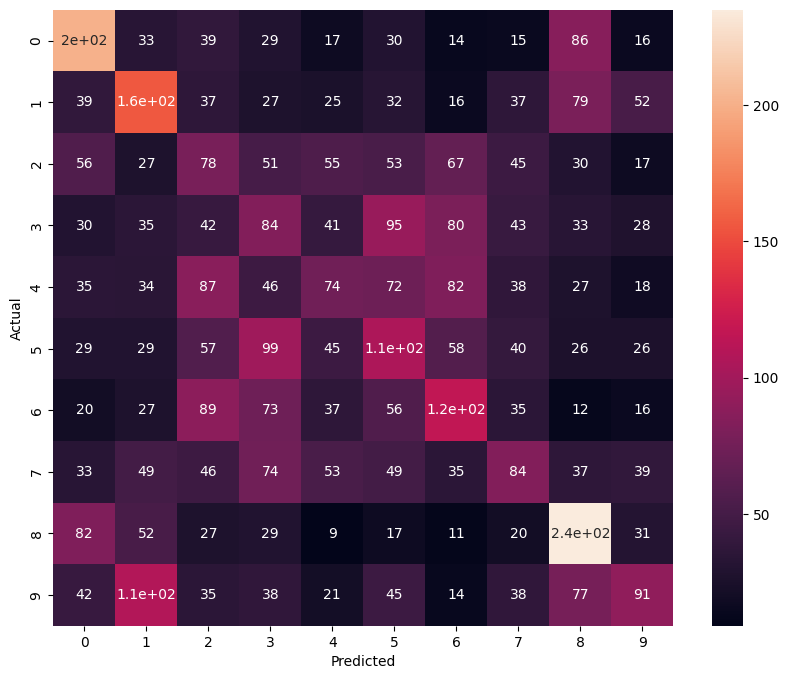

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

predicted_probabilites= nn.functional.softmax(torch.tensor(prediction), dim=1)
predicted_labels = torch.argmax(predicted_probabilites, dim=1).numpy()
cm = confusion_matrix(actual, predicted_labels)
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
#Classification report
print('Classification Report: \n')
target_names=[ "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog" ,"Frog", "Horse", "Ship", "Truck"]
cr=classification_report(actual,predicted_labels,target_names=target_names)
print(cr)

Classification Report: 

              precision    recall  f1-score   support

    Airplane       0.35      0.42      0.38       480
  Automobile       0.28      0.31      0.30       500
        Bird       0.15      0.16      0.15       479
         Cat       0.15      0.16      0.16       511
        Deer       0.20      0.14      0.17       513
         Dog       0.19      0.21      0.20       515
        Frog       0.24      0.24      0.24       481
       Horse       0.21      0.17      0.19       499
        Ship       0.37      0.46      0.41       513
       Truck       0.27      0.18      0.22       509

    accuracy                           0.24      5000
   macro avg       0.24      0.25      0.24      5000
weighted avg       0.24      0.24      0.24      5000



# Visualization:

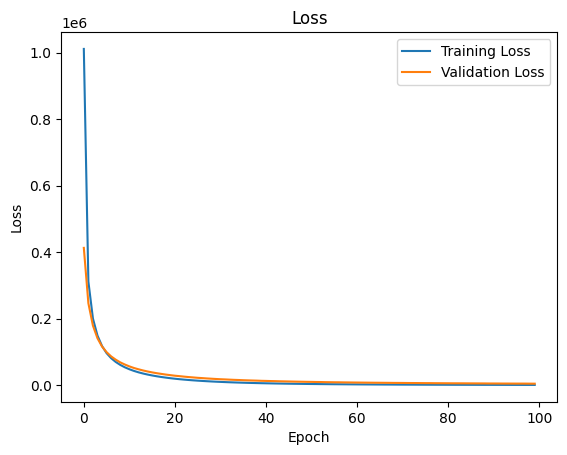

In [14]:
plt.plot(losses_for_train, label='Training Loss')
plt.plot(losses_for_validation, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

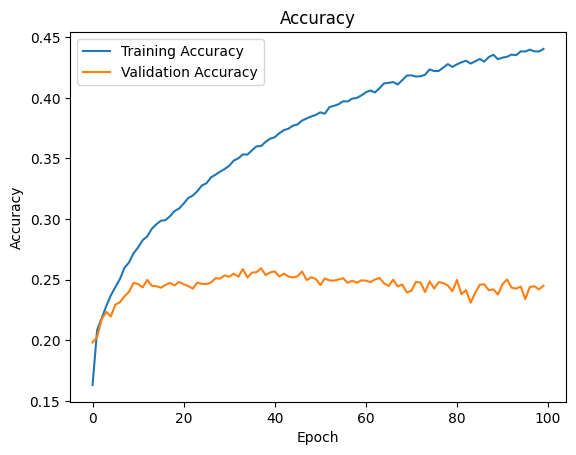

In [15]:
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()